<a href="https://colab.research.google.com/github/jstangelbellarmine/MLA_JRS/blob/main/MLA4_JRS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Machine Learning Assignment 4

####CS-430-ON

John Stangel

##Standard Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


Connect to Drive

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


##Imports for specific models, from [starter code](https://github.com/r2klabs/CS430Repository.git) provided by Bellarmine University.

This section imports the models from SKLearn.

In [3]:

from sklearn.svm import SVC, SVR



###Imports for Splitting Data and Building Pipeline


In [4]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

###Imports for Performance Measures


In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc



###Confusion Matrix Function

This function is for creating a graphical version of the confusion matrix.



In [6]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

###ROC_Curve Function

This function is for plotting the roc_curve




In [7]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

This section imports the code needed for data trees.

In [8]:
from sklearn import tree
from sklearn.tree import export_text
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt


### Problem 1

This section loads the data

In [9]:
file_path = '/content/gdrive/MyDrive/banknote_authentication.csv'


This section uploads files as a data farme.

In [10]:
df = pd.read_csv(file_path)

This section creates the data frame called X and drops forgery.

In [11]:
X = df.drop(columns=['forgery'])

This section creates a data frame y, which is only Forgery.

In [12]:
y = df['forgery']

This allows the program to create a model.

In [13]:
from sklearn.model_selection import train_test_split

This section creates the train/text model with a 20/80 split.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.20, random_state=57)

In [15]:
#This section is simply here to check to make sure my split worked correctly.
#print("X_train shape:", X_train.shape)
#print("X_test shape:", X_test.shape)
#print("y_train shape:", y_train.shape)
#print("y_test shape:", y_test.shape)

This section lists categories and defines numerical features only

In [16]:
 categorical_features = ['week_status', 'day_of_week', 'load_type']
numeric_features = [col for col in X.columns if col not in categorical_features]

This section starts building the pipeline by applying a column transformer with minmax scaling

In [17]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ])

This section builds the pipeline and uses the decision tree classification feature


In [18]:
clf_pipeline = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('num', MinMaxScaler(), ['variance', 'skewness', 'curtosis', 'entropy'])]
                    )),
    ('classifier', tree.DecisionTreeClassifier(random_state=30))
    ])

In [19]:
#This section is only here to check to make sure my decision tree code worked
from sklearn import set_config
set_config(display='diagram')
clf_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['variance', 'skewness',
                                                   'curtosis', 'entropy'])])),
                ('classifier', DecisionTreeClassifier(random_state=30))])

This sections fits my model to the pipeline

In [20]:
clf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['variance', 'skewness',
                                                   'curtosis', 'entropy'])])),
                ('classifier', DecisionTreeClassifier(random_state=30))])

This sections runs the pipeline to predict the y values

In [21]:
y_pred = clf_pipeline.predict(X_test)

This sections creates the confusion matrix

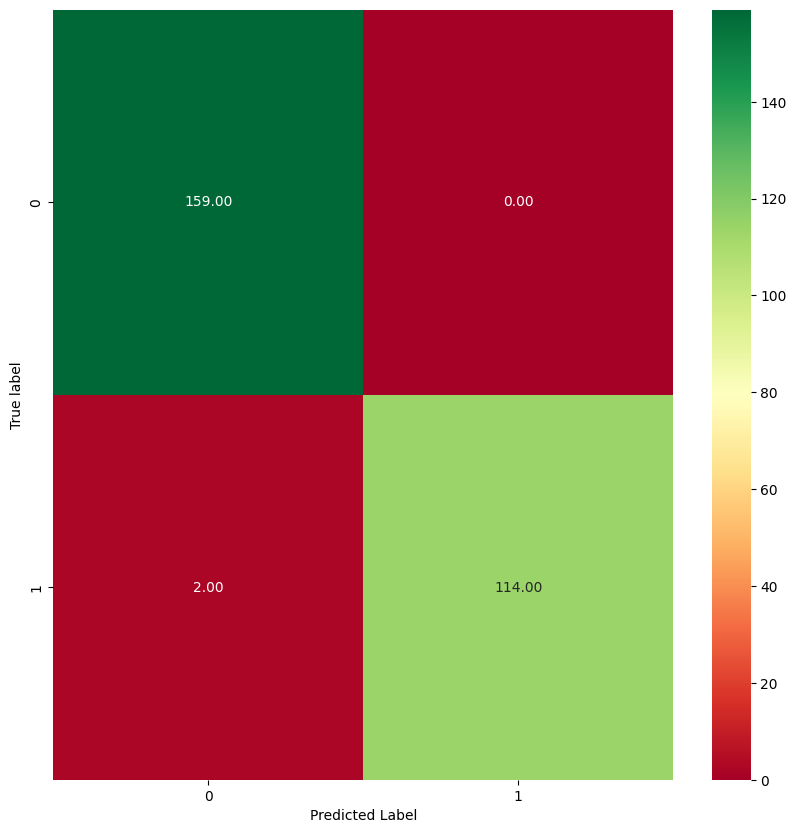

In [22]:
plot_cm(y_test, y_pred)

This section evaluates the model and then prints the evaluations

In [23]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 1.0
Recall: 0.9827586206896551
F1 Score: 0.991304347826087


The precision is the most accurate possible with a score of 1 and all positive indentifications of forgeries were right. Similarly, the recall being close to 1 (.02 off) indicates that almost all forgeries were correctly identified. Lastly, the F1 score shows that this model is very good at its job of telling forgeries from real bills.

###Conclusion

This model is excellent at predicting false banknotes, coming in far ahead of module 2's linear and regression models with much higher precision. This  model is highly suitable for forgery note identification for having a preciison of 1, a recall of 98%, and an F1 score of 99%.

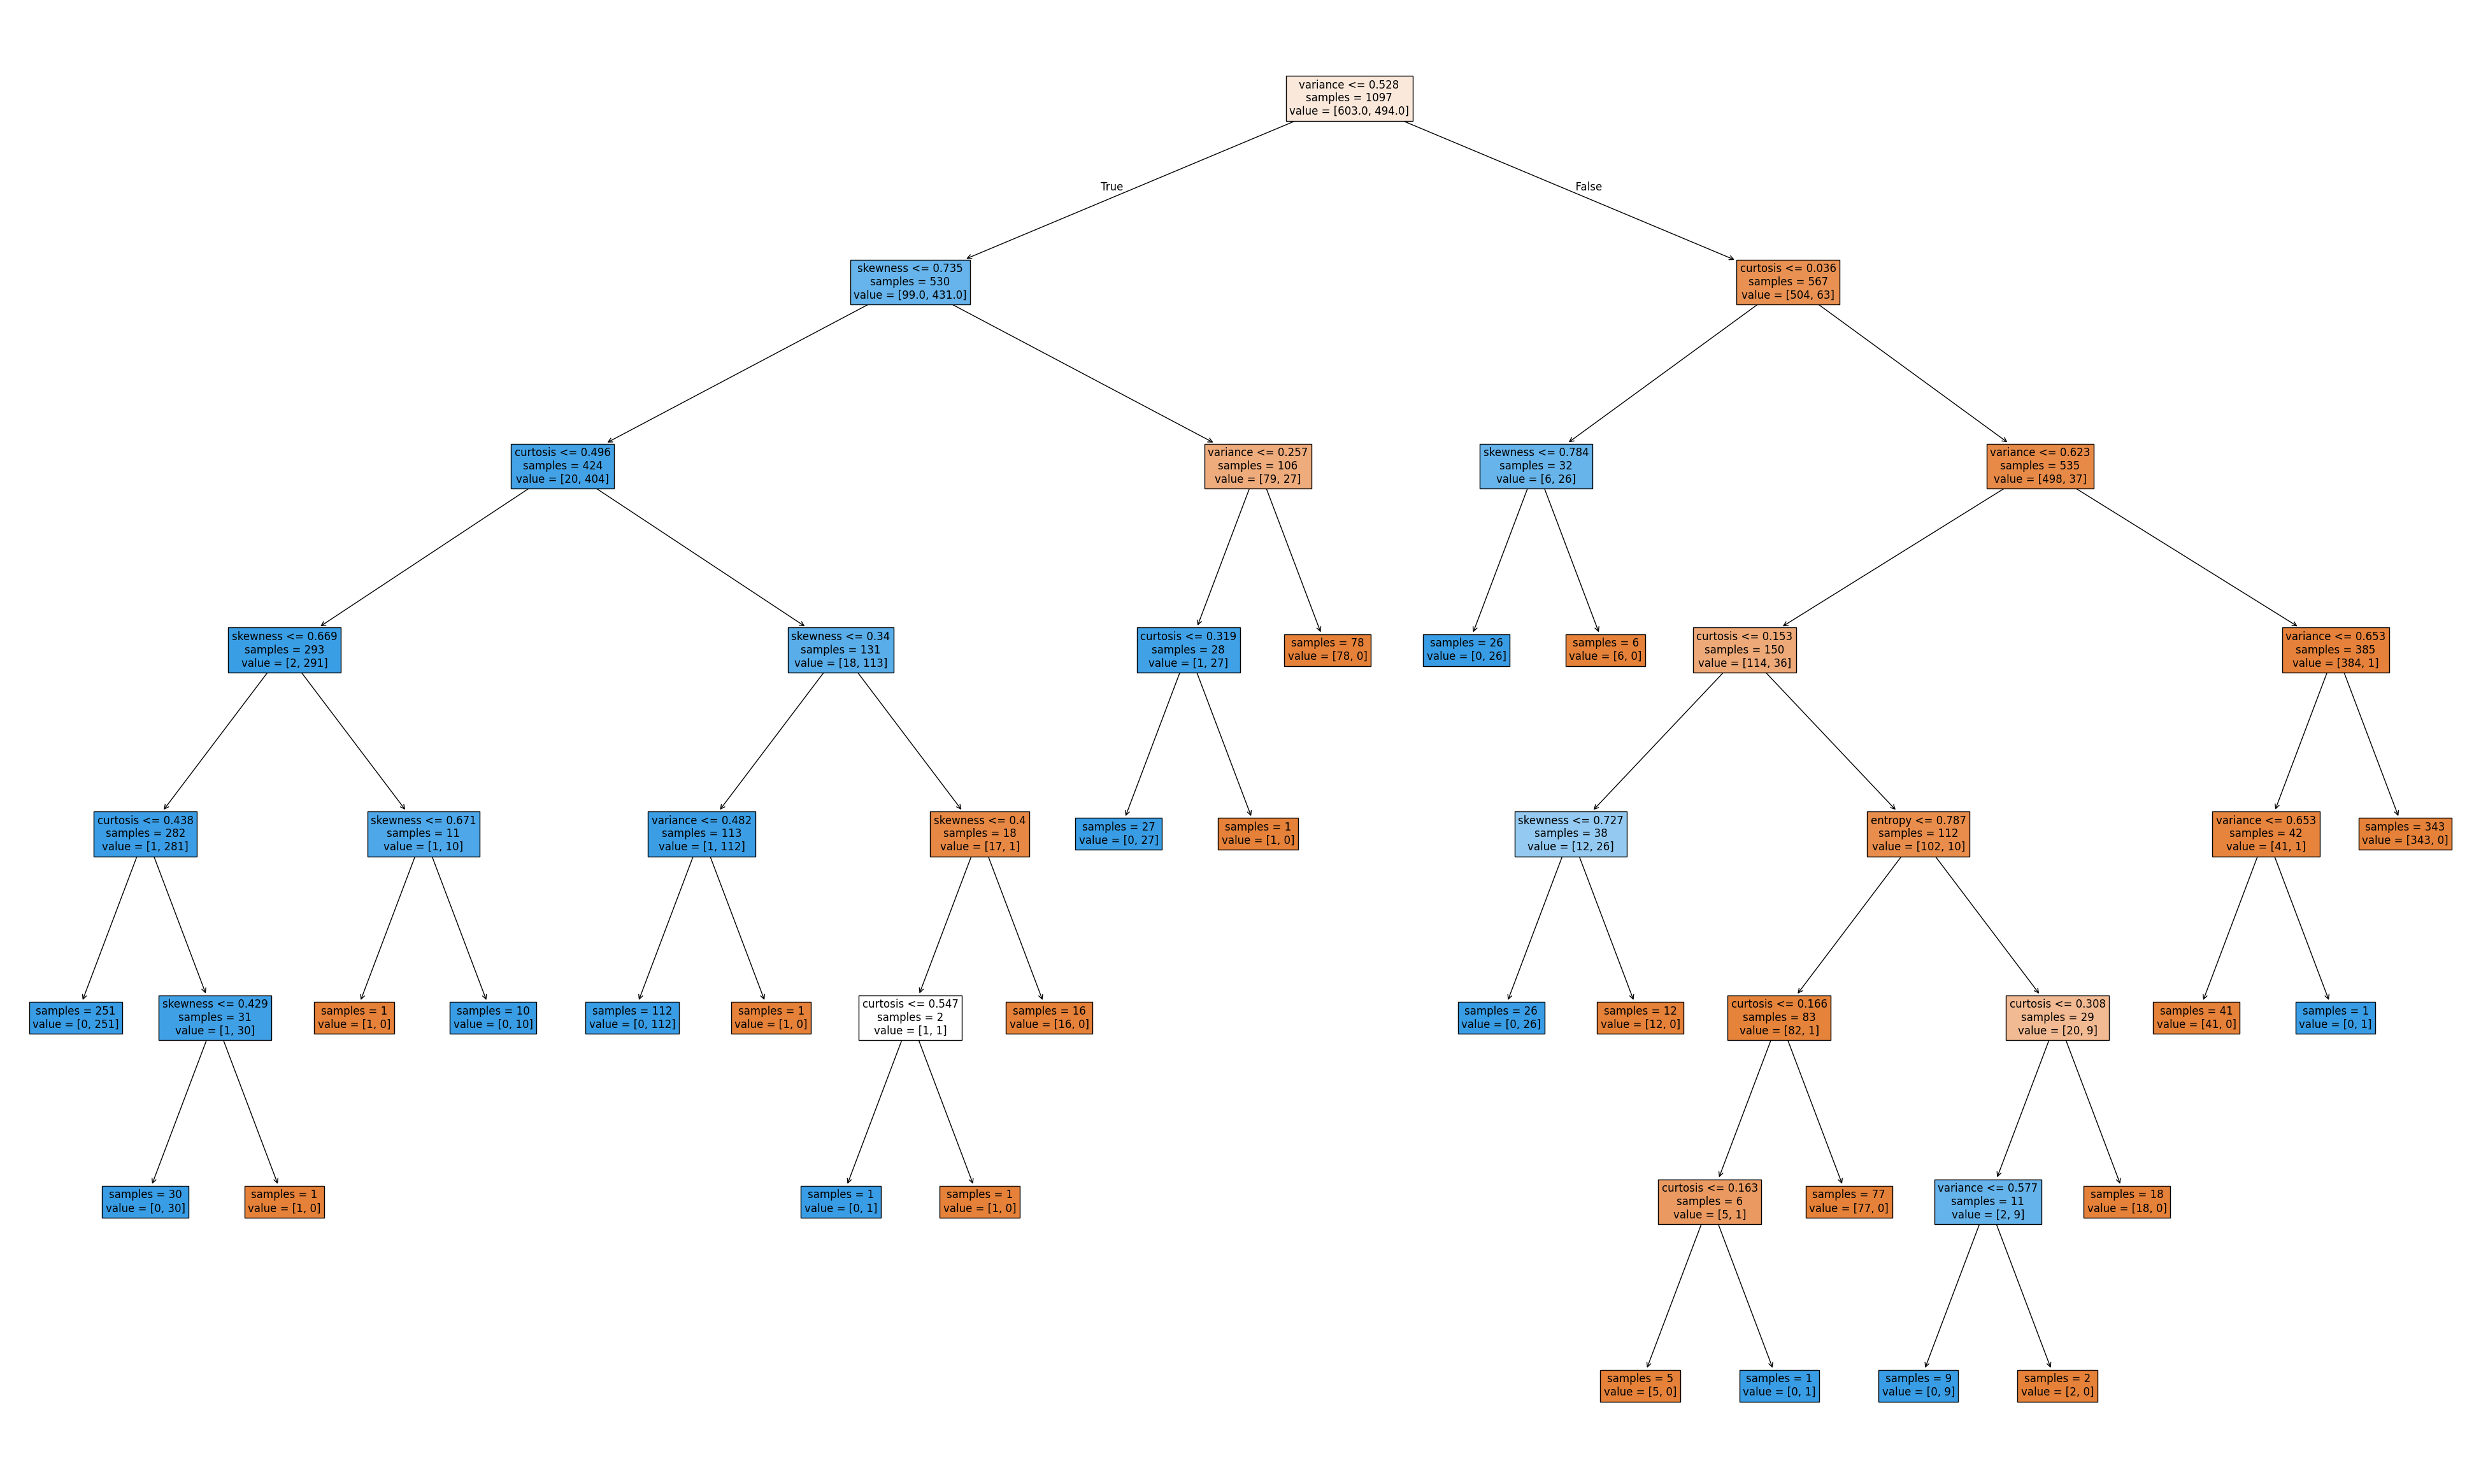

In [24]:
#This section prints the tree to confirm it worked.

fig = plt.figure(figsize=(50,30))
tree.plot_tree(clf_pipeline.named_steps['classifier'], fontsize=12, impurity=False, feature_names=X.columns, filled=True)
plt.show()

### Problem 2

This imports the steel data

In [25]:
df2 = pd.read_csv('/content/gdrive/MyDrive/Steel_industry_data.csv')

this section renames the columns as required

In [26]:
df2.rename(columns={
    'Usage_kWh': 'usage_kwh',
    'Lagging_Current_Reactive.Power_kVarh': 'lag_react_pwr_kvarh',
    'Leading_Current_Reactive_Power_kVarh': 'lead_react_pwr_kvarh',
    'Lagging_Current_Power_Factor': 'lag_current_pwr',
    'Leading_Current_Power_Factor': 'lead_current_pwr',
    'NSM': 'nsm',
    'WeekStatus': 'week_status',
    'Day_of_week': 'day_of_week',
    'Load_Type': 'load_type'
}, inplace=True)

this section creates two variables, x2 and y2






In [27]:
X2 = df2.drop(columns=['date', 'usage_kwh'])
y2 = df2['usage_kwh']

This section creates the data into a 80/20 split for testing and training

In [28]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.20, random_state=33)

In [29]:
#this section is soley for testing

print("X2_train shape:", X2_train.shape)
print("X2_test shape:", X2_test.shape)
print("y2_train shape:", y2_train.shape)
print("y2_test shape:", y2_test.shape)

X2_train shape: (28032, 9)
X2_test shape: (7008, 9)
y2_train shape: (28032,)
y2_test shape: (7008,)


This section prepares the numerical data for the pipeline.


In [30]:
categorical_features = ['week_status', 'day_of_week', 'load_type']
numeric_features = [col for col in X2.columns if col not in categorical_features]

this section employs the columntransformer

In [31]:
preprocessor2 = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

this section creates the model pipeline

In [32]:
reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor2),
    ('regressor', DecisionTreeRegressor(random_state=42))
    ])

This section shows the success of the pipeline creation

In [33]:
set_config(display='diagram')
reg_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['lag_react_pwr_kvarh',
                                                   'lead_react_pwr_kvarh',
                                                   'CO2(tCO2)',
                                                   'lag_current_pwr',
                                                   'lead_current_pwr', 'nsm']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['week_status', 'day_of_week',
                                                   'load_type'])])),
                ('regressor', DecisionTreeRegressor(random_state=42))])

This section fits the pipeline to the decision tree regression equation

In [34]:
reg_pipeline.fit(X2_train, y2_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['lag_react_pwr_kvarh',
                                                   'lead_react_pwr_kvarh',
                                                   'CO2(tCO2)',
                                                   'lag_current_pwr',
                                                   'lead_current_pwr', 'nsm']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['week_status', 'day_of_week',
                                                   'load_type'])])),
                ('regressor', DecisionTreeRegressor(random_state=42))])

this section predicts the y prediction

In [35]:
y2_pred = reg_pipeline.predict(X2_test)

This section calculates the root mean squared error for the test set

In [36]:
rmse_test = np.sqrt(mean_squared_error(y2_test, y2_pred))

This section calculcates the root mean swuared error for the train set

In [37]:
y2_train_pred = reg_pipeline.predict(X2_train)
rmse_train = np.sqrt(mean_squared_error(y2_train, y2_train_pred))

This section prints out the results of the calculations

In [38]:
print("Training RMSE:", rmse_train)
print("Testing RMSE:", rmse_test)

Training RMSE: 2.0259391233967614e-16
Testing RMSE: 1.2327337529684839


The results show us that 2.025...-16 is very close to 0, telling us that the model fits the training examples amazingly well. The testing root mean squared error being very low also indicates the model works.

###Conclusion

This model is the best yet at predicting kwh usage. It's root mean square errors are very low, and this tells us that the model is very accurate.